In [1]:
import pandas as pd
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [2]:
df_train=pd.read_csv(r'E:\train.csv')
df_test=pd.read_csv(r'E:\test.csv')

In [3]:
en_train=df_train.copy()

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
dic={'Id':'Id','SalePrice':'房屋售价','MSSubClass': '建筑的等级','MSZoning': '区域分类','LotFrontage': '距离街道的直线距离','LotArea': '地皮面积','Street': '街道类型','Alley':' 巷子类型','LotShape': '房子整体形状','LandContour': '平整度级别','Utilities': '公共设施类型','LotConfig': '房屋配置','LandSlope': '倾斜度','Neighborhood': '市区物理位置','Condition1': '主干道或者铁路便利程度1','Condition2':'主干道或者铁路便利程度2','BldgType':'住宅类型','HouseStyle': '住宅风格','OverallQual': '整体材料和饰面质量','OverallCond': '总体状况评价','YearBuilt': '建筑年份','YearRemodAdd': '改建年份','RoofStyle': '屋顶类型','RoofMatl': '屋顶材料','Exterior1st': '住宅外墙1st','Exterior2nd': '住宅外墙2nd','MasVnrType': '砌体饰面类型','MasVnrArea': '砌体饰面面积','ExterQual': '外部材料质量','ExterCond': '外部材料的现状','Foundation': '地基类型','BsmtQual': '地下室高度','BsmtCond': '地下室概况','BsmtExposure': '花园地下室墙','BsmtFinType1': '地下室装饰质量type1','BsmtFinSF1': '地下室装饰面积SF1','BsmtFinType2': '地下室装饰质量type2','BsmtFinSF2': '地下室装饰面积SF2','BsmtUnfSF': '未装饰的地下室面积','TotalBsmtSF': '地下室总面积','Heating': '供暖类型','HeatingQC': '供暖质量和条件','CentralAir': '中央空调状况','Electrical': '电力系统','1stFlrSF': '首层面积','2ndFlrSF': '二层面积','LowQualFinSF': '低质装饰面积','GrLivArea': '地面以上居住面积','BsmtFullBath': '地下室全浴室','BsmtHalfBath': '地下室半浴室','FullBath': '高档全浴室','HalfBath': '高档半浴室','BedroomAbvGr': '地下室以上的卧室数量','KitchenAbvGr': '厨房数量','KitchenQual': '厨房质量','Functional': '房屋功用性评级','Fireplaces': '壁炉数量','FireplaceQu': '壁炉质量','GarageType': '车库位置','GarageYrBlt': '车库建造年份','GarageFinish': '车库内饰','GarageCars': '车库车容量大小','GarageArea': '车库面积','GarageQual': '车库质量','GarageCond': '车库条件','PavedDrive': '铺的车道情况','WoodDeckSF': '木地板面积','OpenPorchSF': '开放式门廊区面积','EnclosedPorch': '封闭式门廊区面积','3SsnPorch': '三个季节门廊面积','ScreenPorch': '纱门门廊面积','PoolArea': '泳池面积','PoolQC':'泳池质量','Fence': '围墙质量','MiscFeature': '其他特征','MiscVal': '其他杂项特征值','MoSold': '卖出月份','YrSold': '卖出年份','SaleType': '交易类型','SaleCondition': '交易条件'}

In [7]:
col_names=pd.Series(df_train.columns)
col_names.isin(dic.keys())

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
      ... 
71    True
72    True
73    True
74    True
75    True
76    True
77    True
78    True
79    True
80    True
Length: 81, dtype: bool

In [8]:
df_train.rename(columns=dic,inplace=True)

In [9]:
df_train.head()

Id  建筑的等级 区域分类  距离街道的直线距离   地皮面积  街道类型  巷子类型 房子整体形状 平整度级别  公共设施类型   ...    \
0   1     60   RL       65.0   8450  Pave   NaN    Reg   Lvl  AllPub   ...     
1   2     20   RL       80.0   9600  Pave   NaN    Reg   Lvl  AllPub   ...     
2   3     60   RL       68.0  11250  Pave   NaN    IR1   Lvl  AllPub   ...     
3   4     70   RL       60.0   9550  Pave   NaN    IR1   Lvl  AllPub   ...     
4   5     60   RL       84.0  14260  Pave   NaN    IR1   Lvl  AllPub   ...     

  泳池面积 泳池质量 围墙质量 其他特征 其他杂项特征值 卖出月份  卖出年份  交易类型     交易条件    房屋售价  
0    0  NaN  NaN  NaN       0    2  2008    WD   Normal  208500  
1    0  NaN  NaN  NaN       0    5  2007    WD   Normal  181500  
2    0  NaN  NaN  NaN       0    9  2008    WD   Normal  223500  
3    0  NaN  NaN  NaN       0    2  2006    WD  Abnorml  140000  
4    0  NaN  NaN  NaN       0   12  2008    WD   Normal  250000  

[5 rows x 81 columns]

In [10]:
df_test.rename(columns=dic,inplace=True)

In [11]:
df_test.head()

Id  建筑的等级 区域分类  距离街道的直线距离   地皮面积  街道类型  巷子类型 房子整体形状 平整度级别  公共设施类型  \
0  1461     20   RH       80.0  11622  Pave   NaN    Reg   Lvl  AllPub   
1  1462     20   RL       81.0  14267  Pave   NaN    IR1   Lvl  AllPub   
2  1463     60   RL       74.0  13830  Pave   NaN    IR1   Lvl  AllPub   
3  1464     60   RL       78.0   9978  Pave   NaN    IR1   Lvl  AllPub   
4  1465    120   RL       43.0   5005  Pave   NaN    IR1   HLS  AllPub   

    ...   纱门门廊面积 泳池面积 泳池质量   围墙质量  其他特征 其他杂项特征值 卖出月份  卖出年份  交易类型    交易条件  
0   ...      120    0  NaN  MnPrv   NaN       0    6  2010    WD  Normal  
1   ...        0    0  NaN    NaN  Gar2   12500    6  2010    WD  Normal  
2   ...        0    0  NaN  MnPrv   NaN       0    3  2010    WD  Normal  
3   ...        0    0  NaN    NaN   NaN       0    6  2010    WD  Normal  
4   ...      144    0  NaN    NaN   NaN       0    1  2010    WD  Normal  

[5 rows x 80 columns]

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id              1460 non-null int64
建筑的等级           1460 non-null int64
区域分类            1460 non-null object
距离街道的直线距离       1201 non-null float64
地皮面积            1460 non-null int64
街道类型            1460 non-null object
 巷子类型           91 non-null object
房子整体形状          1460 non-null object
平整度级别           1460 non-null object
公共设施类型          1460 non-null object
房屋配置            1460 non-null object
倾斜度             1460 non-null object
市区物理位置          1460 non-null object
主干道或者铁路便利程度1    1460 non-null object
主干道或者铁路便利程度2    1460 non-null object
住宅类型            1460 non-null object
住宅风格            1460 non-null object
整体材料和饰面质量       1460 non-null int64
总体状况评价          1460 non-null int64
建筑年份            1460 non-null int64
改建年份            1460 non-null int64
屋顶类型            1460 non-null object
屋顶材料            1460 non-null object
住宅外墙1st         1460 non-null object
住宅外墙2nd      

In [13]:
nu=df_train.isnull().sum()[df_train.isnull().sum()>0]

In [14]:
nu_train=df_train[nu.index]
nu_train.describe(include='all')

距离街道的直线距离  巷子类型 砌体饰面类型       砌体饰面面积 地下室高度 地下室概况 花园地下室墙 地下室装饰质量type1  \
count   1201.000000    91   1452  1452.000000  1423  1423   1422         1423   
unique          NaN     2      4          NaN     4     4      4            6   
top             NaN  Grvl   None          NaN    TA    TA     No          Unf   
freq            NaN    50    864          NaN   649  1311    953          430   
mean      70.049958   NaN    NaN   103.685262   NaN   NaN    NaN          NaN   
std       24.284752   NaN    NaN   181.066207   NaN   NaN    NaN          NaN   
min       21.000000   NaN    NaN     0.000000   NaN   NaN    NaN          NaN   
25%       59.000000   NaN    NaN     0.000000   NaN   NaN    NaN          NaN   
50%       69.000000   NaN    NaN     0.000000   NaN   NaN    NaN          NaN   
75%       80.000000   NaN    NaN   166.000000   NaN   NaN    NaN          NaN   
max      313.000000   NaN    NaN  1600.000000   NaN   NaN    NaN          NaN   

       地下室装饰质量type2   电力系统 壁炉质量    车库位置       车库建造年份  车库内饰  车库质量  车库条件 泳池质量  \
count          1422   1459  770    1379  1379.000000  1379  1379  1379    7   
unique            6      5    5       6          NaN     3     5     5    3   
top             Unf  SBrkr   Gd  Attchd          NaN   Unf    TA    TA   Gd   
freq           1256   1334  380     870          NaN   605  1311  1326    3   
mean            NaN    NaN  NaN     NaN  1978.506164   NaN   NaN   NaN  NaN   
std             NaN    NaN  NaN     NaN    24.689725   NaN   NaN   NaN  NaN   
min             NaN    NaN  NaN     NaN  1900.000000   NaN   NaN   NaN  NaN   
25%             NaN    NaN  NaN     NaN  1961.000000   NaN   NaN   NaN  NaN   
50%             NaN    NaN  NaN     NaN  1980.000000   NaN   NaN   NaN  NaN   
75%             NaN    NaN  NaN     NaN  2002.000000   NaN   NaN   NaN  NaN   
max             NaN    NaN  NaN     NaN  2010.000000   NaN   NaN   NaN  NaN   

         围墙质量  其他特征  
count     281    54  
unique      4     4  
top     MnPrv  Shed  
freq      157    49  
mean      NaN   NaN  
std       NaN   NaN  
min       NaN   NaN  
25%       NaN   NaN  
50%       NaN   NaN  
75%       NaN   NaN  
max       NaN   NaN

In [15]:
nu

距离街道的直线距离        259
 巷子类型           1369
砌体饰面类型             8
砌体饰面面积             8
地下室高度             37
地下室概况             37
花园地下室墙            38
地下室装饰质量type1      37
地下室装饰质量type2      38
电力系统               1
壁炉质量             690
车库位置              81
车库建造年份            81
车库内饰              81
车库质量              81
车库条件              81
泳池质量            1453
围墙质量            1179
其他特征            1406
dtype: int64

In [16]:
print('填补缺失值策略：用已有值的分布来填补缺失值，而不是用单一个值')

填补缺失值策略：用已有值的分布来填补缺失值，而不是用单一个值


In [17]:
#距离街道的距离可能与‘市区物理位置相关’
df_train['距离街道的直线距离']=df_train.groupby(df_train['市区物理位置'])['距离街道的直线距离'].transform(
    lambda x: x.fillna(x.median()))

In [18]:
#巷子类型与街道类型和市区位置都相关,且缺失过多，删除
df_train=df_train.drop(' 巷子类型',axis=1)


In [19]:
df_train['其他特征']=df_train['其他特征'].fillna('None')

In [20]:
#有关车库的5个特征的缺失值数量是相同的，推测缺失值是因为没有车库
df_train['车库条件']=df_train['车库条件'].fillna('None')
df_train['车库质量']=df_train['车库质量'].fillna('None')
df_train['车库内饰']=df_train['车库内饰'].fillna('None')
df_train['车库建造年份']=df_train['车库建造年份'].fillna('None')
df_train['车库位置']=df_train['车库位置'].fillna('None')

In [21]:
df_train['泳池面积'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: 泳池面积, dtype: int64

In [22]:
#泳池面积为0的数量与泳池质量缺失值的数量一样，所以缺失值代表没有泳池。建议把此特征改为有无泳池
df_train['泳池质量']=df_train['泳池质量'].fillna('None')

In [23]:
#与泳池特征类似
df_train['围墙质量']=df_train['围墙质量'].fillna('None')

In [24]:
#壁炉这里与泳池质量类似
df_train['壁炉质量']=df_train['壁炉质量'].fillna('None')

In [25]:
df_train['电力系统']=df_train['电力系统'].fillna(df_train['电力系统'].mode()[0])

In [26]:
df_train['地下室高度'].describe()

count     1423
unique       4
top         TA
freq       649
Name: 地下室高度, dtype: object

In [27]:
#地下室高度，地下室概况，花园地下室墙，地下室装饰质量type2，地下室装饰质量type2 ，这5个关于地下室的特征的缺失值数量都是37或38，
#可猜测没有地下室的数量是37或38
df_train['地下室装饰质量type2']=df_train['地下室装饰质量type2'].fillna('None')
df_train['地下室装饰质量type1']=df_train['地下室装饰质量type1'].fillna('None')
df_train['花园地下室墙']=df_train['花园地下室墙'].fillna('None')
df_train['地下室概况']=df_train['地下室概况'].fillna('None')
df_train['地下室高度']=df_train['地下室高度'].fillna('None')

In [28]:
df_train['砌体饰面面积'].isnull().value_counts()

False    1452
True        8
Name: 砌体饰面面积, dtype: int64

In [29]:
#砌体饰面类型，砌体饰面面积  ，情况与地下室类似，缺失都为8
df_train['砌体饰面类型']=df_train['砌体饰面类型'].fillna('None')
df_train['砌体饰面面积']=df_train['砌体饰面面积'].fillna(0)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id              1460 non-null int64
建筑的等级           1460 non-null int64
区域分类            1460 non-null object
距离街道的直线距离       1460 non-null float64
地皮面积            1460 non-null int64
街道类型            1460 non-null object
房子整体形状          1460 non-null object
平整度级别           1460 non-null object
公共设施类型          1460 non-null object
房屋配置            1460 non-null object
倾斜度             1460 non-null object
市区物理位置          1460 non-null object
主干道或者铁路便利程度1    1460 non-null object
主干道或者铁路便利程度2    1460 non-null object
住宅类型            1460 non-null object
住宅风格            1460 non-null object
整体材料和饰面质量       1460 non-null int64
总体状况评价          1460 non-null int64
建筑年份            1460 non-null int64
改建年份            1460 non-null int64
屋顶类型            1460 non-null object
屋顶材料            1460 non-null object
住宅外墙1st         1460 non-null object
住宅外墙2nd         1460 non-null object
砌体饰面类型     

In [31]:
print('查看各特征的分布')

查看各特征的分布


In [32]:
import seaborn as sns

D:\Users\my\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


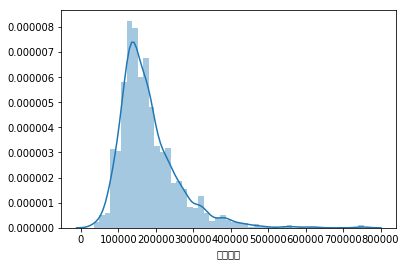

In [33]:
sns.distplot(df_train['房屋售价'])

In [34]:
df_train['房屋售价']=np.log(df_train['房屋售价']+1)

D:\Users\my\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


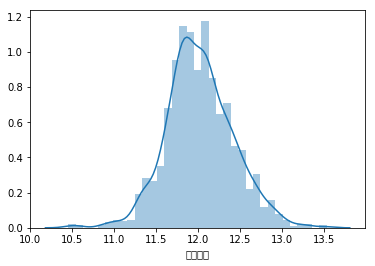

In [35]:
sns.distplot(df_train['房屋售价'])

In [36]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] 
mpl.rcParams['axes.unicode_minus'] = False

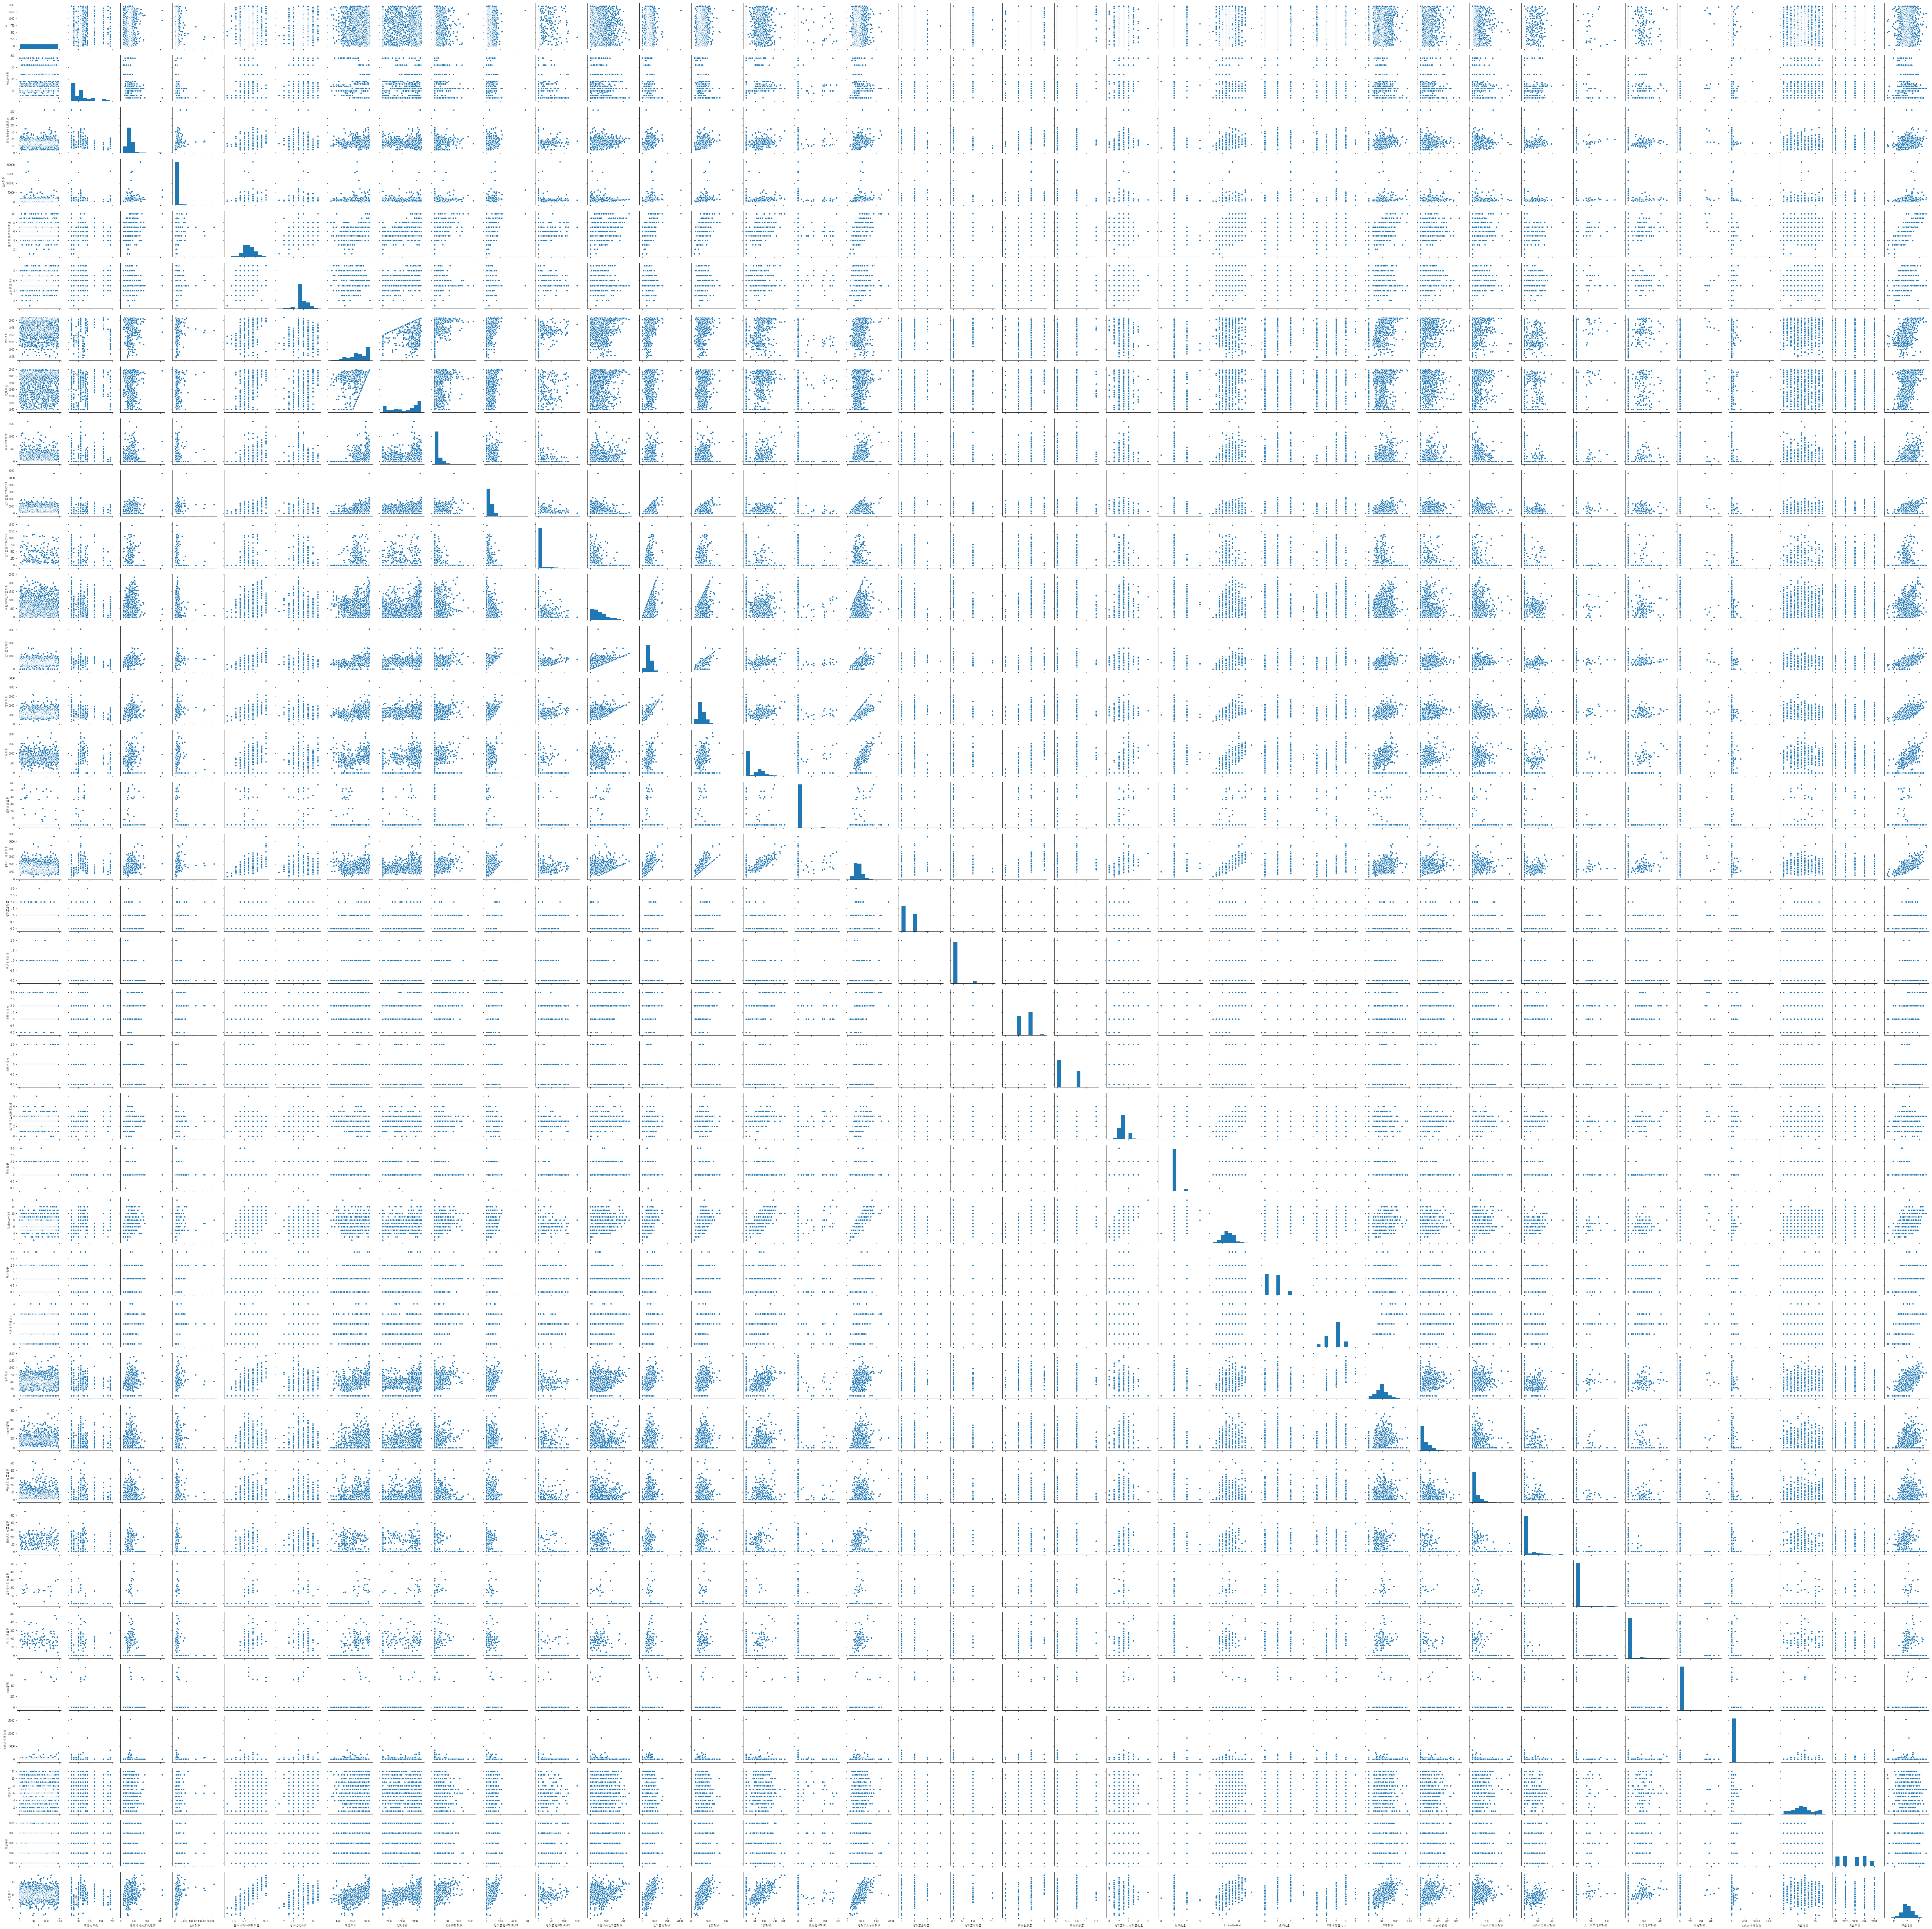

In [37]:
sns.pairplot(df_train)

In [38]:
print('各特征与目标变量的散点图分析：')
print('1.地皮面积：其直方图90%度的数据集中在第一面元，散点图类似一条垂直于x轴的直线，看上去这一特征属于低方差变量，但也许是因为其离散值大，导致面元太大，应对其离散值做处理')
print('2.Id：明显的，其变化不会引起目标变量的任何变化，可以舍弃')
print('3.建筑等级：类似倒U形的散点图，中间高，两边低，可以做一个二次的转换')
print('4.距离街道的直线距离：分布类似于Id，但从概念上理解，它与目标变量间应该有关系，所以需要进一步分析')
print('5.整体材料和饰面质量、总体状况评价、地下室总面积、首层面积、二层面积、地面以上居住面积、TotRmsAbvGrd、壁炉数量、车库容量大小、车库面积：这些特征与目标变量明显线性相关')
print('6.卖出月份、卖出年份：明显的，其变化不会引起目标变量的任何变化，可以舍弃')
print('7.泳池面积：绝大多数都为0，可以舍弃。概念上与目标变量关系挺大的，但数据上95%的都为0，没有分析的意义')
print('8.其他杂质特征值、纱门门廊面积、三个季节门廊面积：分布上90%以上为0，但还是转换为有无此特征，先别舍弃')
print('9.木地板面积、开放式门廊面积、封闭式门廊面积、地下室以上的卧室数量：从下方看是线性的，但从顶部看，它们与目标变量关系是一条横线，即它们取小值时，目标变量有小值，也有大值，但它们取大值时，目标变量只取大值，没有小值。因此，肯定还有其他特征在影响，可能需要交互')
print('10.关于浴室的几个特征：都是相关的，随着浴室数量的增加，售价增加')
print('11.厨房数量：数量为2的最低价明显高于数量为1的，所以还是有关系的，也许从平均值或中位数来看，是无关的')

各特征与目标变量的散点图分析：
1.地皮面积：其直方图90%度的数据集中在第一面元，散点图类似一条垂直于x轴的直线，看上去这一特征属于低方差变量，但也许是因为其离散值大，导致面元太大，应对其离散值做处理
2.Id：明显的，其变化不会引起目标变量的任何变化，可以舍弃
3.建筑等级：类似倒U形的散点图，中间高，两边低，可以做一个二次的转换
4.距离街道的直线距离：分布类似于Id，但从概念上理解，它与目标变量间应该有关系，所以需要进一步分析
5.整体材料和饰面质量、总体状况评价、地下室总面积、首层面积、二层面积、地面以上居住面积、TotRmsAbvGrd、壁炉数量、车库容量大小、车库面积：这些特征与目标变量明显线性相关
6.卖出月份、卖出年份：明显的，其变化不会引起目标变量的任何变化，可以舍弃
7.泳池面积：绝大多数都为0，可以舍弃。概念上与目标变量关系挺大的，但数据上95%的都为0，没有分析的意义
8.其他杂质特征值、纱门门廊面积、三个季节门廊面积：分布上90%以上为0，但还是转换为有无此特征，先别舍弃
9.木地板面积、开放式门廊面积、封闭式门廊面积、地下室以上的卧室数量：从下方看是线性的，但从顶部看，它们与目标变量关系是一条横线，即它们取小值时，目标变量有小值，也有大值，但它们取大值时，目标变量只取大值，没有小值。因此，肯定还有其他特征在影响，可能需要交互
10.关于浴室的几个特征：都是相关的，随着浴室数量的增加，售价增加
11.厨房数量：数量为2的最低价明显高于数量为1的，所以还是有关系的，也许从平均值或中位数来看，是无关的


D:\Users\my\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


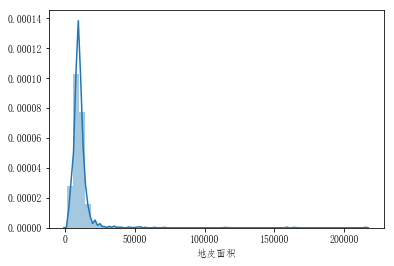

In [39]:
#地皮面积
sns.distplot(df_train['地皮面积'])


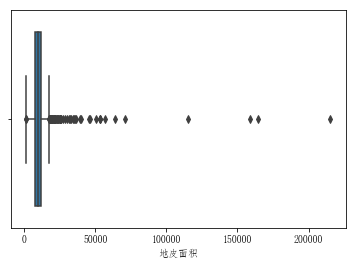

In [40]:
sns.boxplot(df_train['地皮面积'])

In [41]:
dpmj_sub=df_train['地皮面积'][df_train['地皮面积']<30000]

D:\Users\my\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


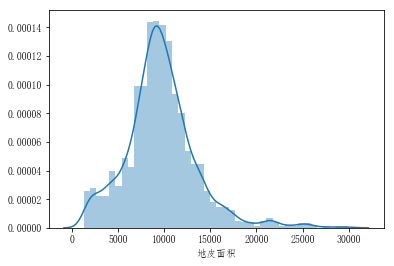

In [42]:
sns.distplot(dpmj_sub)

D:\Users\my\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


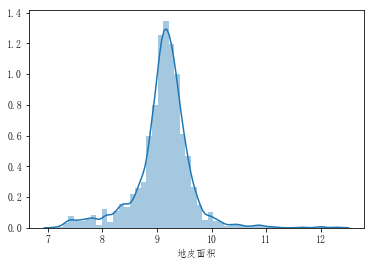

In [43]:
log_dpmj=np.log(1+df_train['地皮面积'])
log_dpmj_sub=np.log(1+dpmj_sub)
sns.distplot(log_dpmj)


D:\Users\my\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


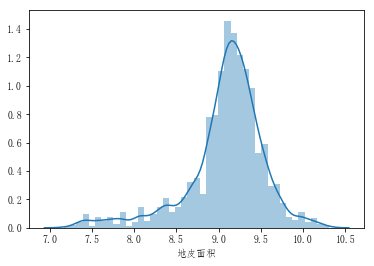

In [44]:
sns.distplot(log_dpmj_sub)

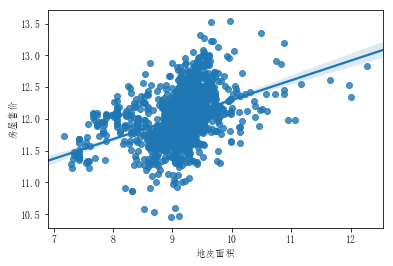

In [45]:
#经过log转换后，完整的‘地皮面积’特征数据集分布就已经类似于正态了
df_train['地皮面积']=log_dpmj
sns.regplot(x=df_train['地皮面积'],y=df_train['房屋售价'],data=df_train)

In [46]:
print('可见，地皮面积与房屋售价更有相关性了，不像之前的，几乎一条直线')

可见，地皮面积与房屋售价更有相关性了，不像之前的，几乎一条直线


In [47]:
#删除Id，卖出月份，卖出年份
df_train.drop(columns='Id',inplace=True)

In [48]:
df_train.drop(columns=['卖出月份','卖出年份'],inplace=True)

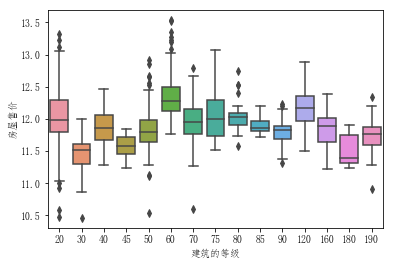

In [49]:
#建筑的等级,从平均值来看，也确实有先上升再下降的趋势
sns.boxplot(x=df_train['建筑的等级'],y=df_train['房屋售价'],data=df_train)

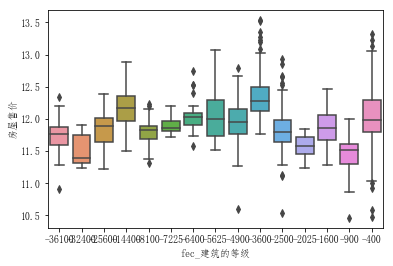

In [50]:
df_train['fec_建筑的等级']=-np.square(df_train['建筑的等级'])
sns.boxplot(x=df_train['fec_建筑的等级'],y=df_train['房屋售价'],data=df_train)

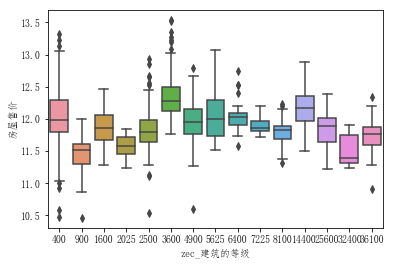

In [51]:
df_train['zec_建筑的等级']=np.square(df_train['建筑的等级'])
sns.boxplot(x=df_train['zec_建筑的等级'],y=df_train['房屋售价'],data=df_train)

In [52]:
print('可见，进行二次转换没有任何效果，先别处理‘建筑的等级’。但为什么建筑等级高，售价反而会下降呢？')

可见，进行二次转换没有任何效果，先别处理‘建筑的等级’。但为什么建筑等级高，售价反而会下降呢？


In [53]:
#把其他杂质特征值、纱门门廊面积、三个季节门廊面积、泳池面积、低质装饰面积 转为二元变量，0表示无，1表示有
er=['其他杂项特征值','纱门门廊面积','三个季节门廊面积','泳池面积','低质装饰面积']
for h in er:
    df_train[df_train[h]==0][h]=0
    df_train[df_train[h]!=0][h]=1

D:\Users\my\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Users\my\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


D:\Users\my\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


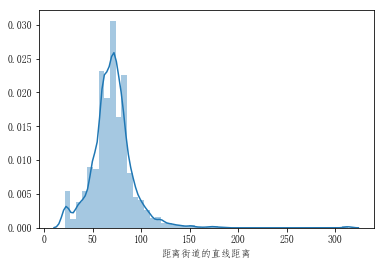

In [54]:
#距离街道的直线距离
sns.distplot(df_train['距离街道的直线距离'])

D:\Users\my\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


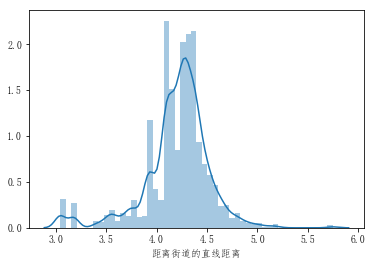

In [55]:
sns.distplot(np.log(df_train['距离街道的直线距离']))

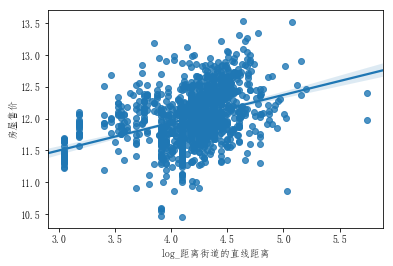

In [56]:
df_train['log_距离街道的直线距离']=np.log(df_train['距离街道的直线距离'])
sns.regplot(x='log_距离街道的直线距离',y='房屋售价',data=df_train)

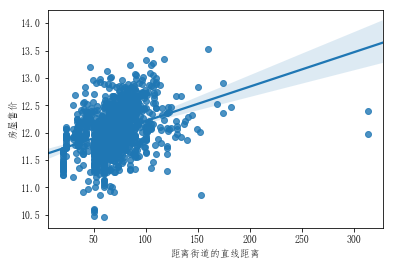

In [57]:
sns.regplot(x='距离街道的直线距离',y='房屋售价',data=df_train)

In [58]:
df_train['房屋售价'].corr(df_train['log_距离街道的直线距离'])

0.3612722948731309

In [59]:
df_train['房屋售价'].corr(df_train['距离街道的直线距离'])

0.3532882212613174

In [60]:
print('log转换并没有增强距离街道的直线距离与目标间的相关性，所以不转换')

log转换并没有增强距离街道的直线距离与目标间的相关性，所以不转换


In [61]:
df_train.drop(columns='log_距离街道的直线距离',inplace=True)

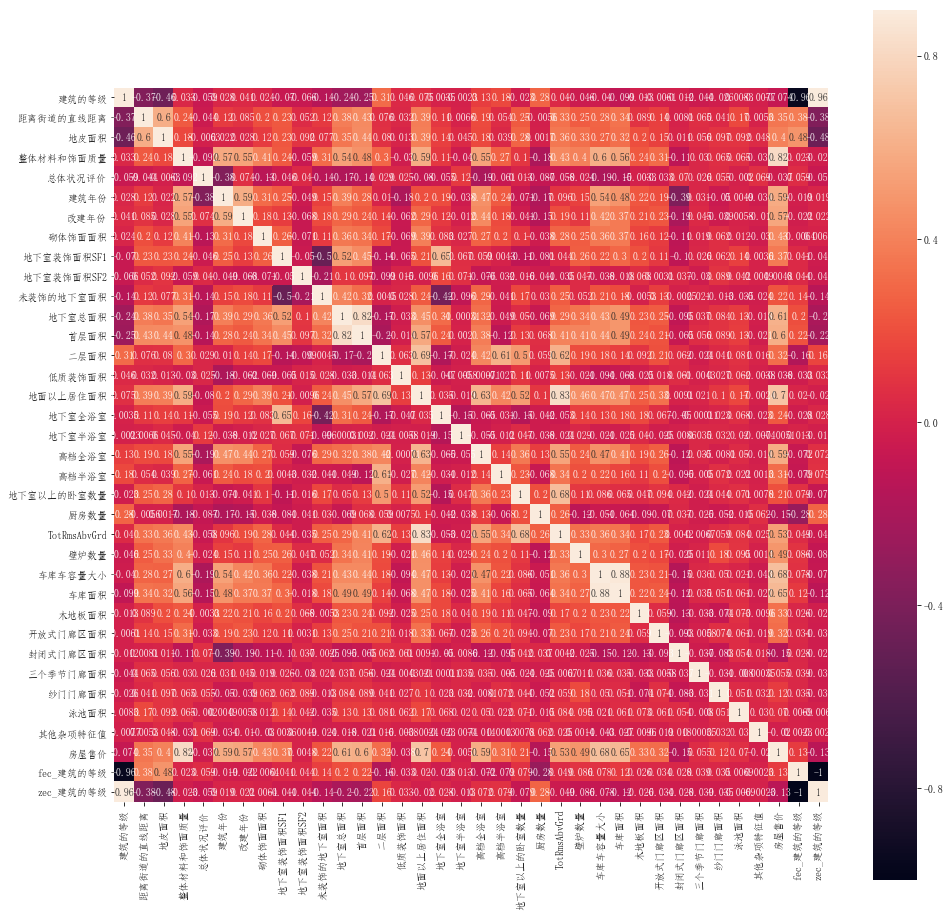

In [62]:
#相关系数矩阵
plt.subplots(figsize=(16,16))
sns.heatmap(df_train.corr(),vmax=0.9,annot=True,square=True)

In [63]:
#热力图分析
print('1.两两特征间相关系数较高的组：')
print('地面以上居住面积vs TotRmsAbvGrd，地下室总面积vs首层面积，车库车容量大小vs车库面积')
print('-----------------------------')
print('2.与目标变量相关性较大的特征，前10个：')
print('整体材料和饰面质量，地面以上居住面积，车库车容量大小，车库面积 ，地下室总面积，首层面积，高档全浴室，建筑年份，改建年份，TotRmsAbvGrd')
print('-----------------------------')
print('3.从第2点分析得出，房价最重要的两个因素：质量和面积。')
print('与现实矛盾之处：地理位置才是最重要的')
print('-----------------------------')
print('4.矛盾原因：相关系数只能算数值型特征，关于地理位置的几个特征是非数值型的。')

1.两两特征间相关系数较高的组：
地面以上居住面积vs TotRmsAbvGrd，地下室总面积vs首层面积，车库车容量大小vs车库面积
-----------------------------
2.与目标变量相关性较大的特征，前10个：
整体材料和饰面质量，地面以上居住面积，车库车容量大小，车库面积 ，地下室总面积，首层面积，高档全浴室，建筑年份，改建年份，TotRmsAbvGrd
-----------------------------
3.从第2点分析得出，房价最重要的两个因素：质量和面积。
与现实矛盾之处：地理位置才是最重要的
-----------------------------
4.矛盾原因：相关系数只能算数值型特征，关于地理位置的几个特征是非数值型的。


In [64]:
#数据类型转换

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
建筑的等级           1460 non-null int64
区域分类            1460 non-null object
距离街道的直线距离       1460 non-null float64
地皮面积            1460 non-null float64
街道类型            1460 non-null object
房子整体形状          1460 non-null object
平整度级别           1460 non-null object
公共设施类型          1460 non-null object
房屋配置            1460 non-null object
倾斜度             1460 non-null object
市区物理位置          1460 non-null object
主干道或者铁路便利程度1    1460 non-null object
主干道或者铁路便利程度2    1460 non-null object
住宅类型            1460 non-null object
住宅风格            1460 non-null object
整体材料和饰面质量       1460 non-null int64
总体状况评价          1460 non-null int64
建筑年份            1460 non-null int64
改建年份            1460 non-null int64
屋顶类型            1460 non-null object
屋顶材料            1460 non-null object
住宅外墙1st         1460 non-null object
住宅外墙2nd         1460 non-null object
砌体饰面类型          1460 non-null object
砌体饰面面积  

In [66]:
#第一步，找出非数值型特征，对它们转换
obj_col=[]
for c in df_train.columns:
    if (df_train[c].values.dtype!='int64') & (df_train[c].values.dtype!='float64'):
        obj_col.append(c)

In [67]:
obj_col

['区域分类',
 '街道类型',
 '房子整体形状',
 '平整度级别',
 '公共设施类型',
 '房屋配置',
 '倾斜度',
 '市区物理位置',
 '主干道或者铁路便利程度1',
 '主干道或者铁路便利程度2',
 '住宅类型',
 '住宅风格',
 '屋顶类型',
 '屋顶材料',
 '住宅外墙1st',
 '住宅外墙2nd',
 '砌体饰面类型',
 '外部材料质量',
 '外部材料的现状',
 '地基类型',
 '地下室高度',
 '地下室概况',
 '花园地下室墙',
 '地下室装饰质量type1',
 '地下室装饰质量type2',
 '供暖类型',
 '供暖质量和条件',
 '中央空调状况',
 '电力系统',
 '厨房质量',
 '房屋功用性评级',
 '壁炉质量',
 '车库位置',
 '车库建造年份',
 '车库内饰',
 '车库质量',
 '车库条件',
 '铺的车道情况',
 '泳池质量',
 '围墙质量',
 '其他特征',
 '交易类型',
 '交易条件']

In [68]:
df_obj=df_train.reindex(columns=obj_col)

In [69]:
df_train['车库建造年份'][df_train['车库建造年份']=='None']=0

D:\Users\my\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_train['车库建造年份']=df_train['车库建造年份'].astype('int64')

In [71]:
df_obj['区域分类'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [72]:
df_obj['区域分类'][df_obj['区域分类']=='RL']=0
df_obj['区域分类'][df_obj['区域分类']=='RM']=1
df_obj['区域分类'][df_obj['区域分类']=='C (all)']=2
df_obj['区域分类'][df_obj['区域分类']=='FV']=3
df_obj['区域分类'][df_obj['区域分类']=='RH']=4

In [73]:
df_train['区域分类'][df_train['区域分类']=='RL']=0
df_train['区域分类'][df_train['区域分类']=='RM']=1
df_train['区域分类'][df_train['区域分类']=='C (all)']=2
df_train['区域分类'][df_train['区域分类']=='FV']=3
df_train['区域分类'][df_train['区域分类']=='RH']=4

D:\Users\my\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Users\my\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Users\my\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\my\Anaconda3\lib\si

In [74]:
df_obj['区域分类'].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [75]:
df_obj['区域分类'].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [76]:
obj_uniq={}
for c in obj_col:
    obj_uniq[c]=df_train[c].unique()

In [77]:
obj_uniq

{'区域分类': array([0, 1, 2, 3, 4], dtype=object),
 '街道类型': array(['Pave', 'Grvl'], dtype=object),
 '房子整体形状': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 '平整度级别': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 '公共设施类型': array(['AllPub', 'NoSeWa'], dtype=object),
 '房屋配置': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 '倾斜度': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 '市区物理位置': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
        'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
        'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
        'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
        'Blueste'], dtype=object),
 '主干道或者铁路便利程度1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 '主干道或者铁路便利程度2': array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
       dtype=object),
 '住宅类型': array(['1Fam', '2fmCo

In [78]:
obj_uniq.pop('车库建造年份')

array([2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1991, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 2008, 1957, 1920, 1966, 1959, 1995, 1954, 1953,    0, 1983,
       1977, 1997, 1985, 1963, 1981, 1964, 1999, 1935, 1990, 1945, 1987,
       1989, 1915, 1956, 1948, 1974, 2009, 1950, 1961, 1921, 1900, 1979,
       1951, 1969, 1936, 1975, 1971, 1923, 1984, 1926, 1955, 1986, 1988,
       1916, 1932, 1972, 1918, 1980, 1924, 1996, 1940, 1949, 1994, 1910,
       1978, 1982, 1992, 1925, 1941, 2010, 1927, 1947, 1937, 1942, 1938,
       1952, 1928, 1922, 1934, 1906, 1914, 1946, 1908, 1929, 1933],
      dtype=int64)

In [79]:
del obj_uniq['区域分类']

In [80]:
obj_uniq

{'街道类型': array(['Pave', 'Grvl'], dtype=object),
 '房子整体形状': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object),
 '平整度级别': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object),
 '公共设施类型': array(['AllPub', 'NoSeWa'], dtype=object),
 '房屋配置': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object),
 '倾斜度': array(['Gtl', 'Mod', 'Sev'], dtype=object),
 '市区物理位置': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
        'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
        'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
        'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
        'Blueste'], dtype=object),
 '主干道或者铁路便利程度1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
        'RRNe'], dtype=object),
 '主干道或者铁路便利程度2': array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
       dtype=object),
 '住宅类型': array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [ ]:
for key,value in obj_uniq.items():
    i=0
    for v in value:
        df_train[key][df_train[key]==v]=i
        i=i+1

D:\Users\my\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
df_train['供暖类型'].unique()

In [ ]:
for c in obj_col:
    df_train[c]=df_train[c].astype('int64')

In [ ]:
sns.barplot(x='区域分类',y='房屋售价',data=df_train)

In [ ]:
fig,axis=plt.subplots(nrows=len(obj_col), ncols=1,figsize=(5,5*len(obj_col)))
i=0
for c in obj_col:
    sns.barplot(x=c,y='房屋售价',data=df_train,ax=axis[i])
    i=i+1

In [ ]:
#分类变量的柱状图分析

In [ ]:
std={}
for c in obj_col:
    ser=df_train.groupby(c)['房屋售价'].mean()
    std[c]=ser.std()

In [ ]:
df_std=pd.Series(std)

In [ ]:
df_std.sort_values(ascending=False)

In [ ]:
print('1.各类之间区别较大的特征,即对房屋售价影响较大的特征：')
print('外部材料质量，厨房质量，地下室高度，地下室概况，主干道或者铁路便利程度2，区域分类 ')
print('-----------------------------------')
print('2.各类之间区别较小的特征,即对房屋售价影响较小的特征：')
print('住宅类型,房子整体形状,围墙质量,公共设施类型,房屋配置,倾斜度')

In [ ]:
print('总结，1.重要的元素：地理位置，材料质量，地下室。')

In [ ]:
#对重要的几个特征，联合起来，更深层的分析

In [ ]:
big_col=['整体材料和饰面质量','地面以上居住面积','车库车容量大小','车库面积' ,'地下室总面积','首层面积','高档全浴室','建筑年份','改建年份','TotRmsAbvGrd','外部材料质量','厨房质量','地下室高度','地下室概况','主干道或者铁路便利程度2','区域分类']

In [ ]:
big_col

In [ ]:
#材料质量分析

In [ ]:
sns.regplot(x=df_train['整体材料和饰面质量'],y=df_train['房屋售价'])

In [ ]:
sns.regplot(x=df_train['外部材料质量'],y=df_train['房屋售价'])

In [ ]:
sns.boxplot(x=df_train['外部材料质量'],y=df_train['房屋售价'])

In [ ]:
print('结论：1.材料质量越高，售价越高，从均值看，质量最好的比最差的高：30%（粗略估计）。2.可推测，外部材料质量，高到底：2>0>1>3')

In [ ]:
#分析地下室

In [ ]:
sns.boxplot(x=df_train['地下室高度'],y=df_train['房屋售价'])

In [ ]:
sns.boxplot(x=df_train['地下室概况'],y=df_train['房屋售价'])

In [ ]:
sns.regplot(x=df_train['地下室总面积'],y=df_train['房屋售价'])

In [ ]:
df_train.drop(df_train[df_train['地下室总面积']>6000].index,inplace=True)

In [ ]:
sns.regplot(x=df_train['地下室总面积'],y=df_train['房屋售价'])

In [ ]:
g=sns.FacetGrid(df_train,row='地下室概况',col='地下室高度')
g.map(plt.scatter,'地下室总面积','房屋售价')

In [ ]:
print('结论：')
print('1.受面积影响较小的细分类：地下室概况=3且地下室高度=1，地下室概况=3且地下室高度=4。（从图中看，地下室概况=3的类别，似乎都这样）')
print('2.多数类别都随着面积增大，售价增大，增的最快的是：地下室概况=0且地下室高度=1')
print('3.平均（整体）售价最高的类别：地下室概况=0且地下室高度=2')

In [ ]:
#面积与位置分析

In [ ]:
sns.regplot(x=df_train['地下室总面积'],y=df_train['地面以上居住面积'])

In [ ]:
print('1.竖直的那条线表示没有地下室。2.同一x下y的最小值构成了一条整齐的斜线，这可能与房屋建造和政府规定相关。3.总体而言，二者正相关')
print('----------------------------')
print('4.既然二者正相关，所以研究一个就可以了')

In [ ]:
g=sns.FacetGrid(df_train,row='主干道或者铁路便利程度2',col='区域分类')
g.map(plt.scatter,'地面以上居住面积','房屋售价')

In [ ]:
print('1.集中性：对主干道或者铁路便利程度2，房屋集中在主干道或者铁路便利程度2=0的类别。对区域分类，较为分散，但最多的是区域分类=0')
print('--------------------------')
print('2.斜率：主干道或者铁路便利程度2=0且区域分类=4，此类斜率比其他类别低。而此类的平均房屋售价属于中等，说明位置不差。那为何面积的影响收到压制，受谁的压制？')
print('--------------------------')
print('3.平均房屋售价：明显地，主干道或者铁路便利程度2=0且区域分类=3整体较高，主干道或者铁路便利程度2=0且区域分类=2整体较低。可推测地理位置的好坏')

In [ ]:
g=sns.FacetGrid(df_train,row='主干道或者铁路便利程度2',col='区域分类')
g.map(plt.scatter,'首层面积','地面以上居住面积')

In [ ]:
print('1.前一个分析的第3点是错误的，从此图看出，面积分布：主干道或者铁路便利程度2=0且区域分类=3整体较高，主干道或者铁路便利程度2=0且区域分类=2整体较低。因此售价是面积的影响，而不仅地理位置。')
print('------------------')
print('2.主干道或者铁路便利程度2=0且区域分类=0，这里的楼层整体较高，因为散布图较厚')
print('------------------')
print('3.主干道或者铁路便利程度2=0且区域分类=3，此类的散布图是两条斜率不同的直线，可推测这里由两种类型的房子构成')

In [ ]:
#房屋时间分析

In [ ]:
fig,axis=plt.subplots(1,1,figsize=(16,5))
sns.boxplot(x=df_train['建筑年份'],y=df_train['地面以上居住面积'])

In [ ]:
fig,axis=plt.subplots(1,1,figsize=(16,5))
sns.boxplot(x=df_train['建筑年份'],y=df_train['房屋售价'])

In [ ]:
print('1.建筑年份对房屋售价的影响，很可能是地面以上居住面积在背后作用。看第一第二图的首尾两部分，地面以上居住面积都比中间部分高，相应房屋售价也比中间部分高')

In [ ]:
#车库

In [ ]:
sns.boxplot(x=df_train['车库车容量大小'],y=df_train['车库面积'])

In [ ]:
fig,axis=plt.subplots(1,3,figsize=(16,5))
sns.barplot(x='区域分类',y='车库面积',data=df_train,ax=axis[0])
sns.barplot(x='区域分类',y='房屋售价',data=df_train,ax=axis[1])
sns.barplot(x='区域分类',y='地面以上居住面积',data=df_train,ax=axis[2])

In [ ]:
print('1.车库对售价的影响小于房屋面积的影响。2.区域分类=2，其房屋面积小，但车库面积大，很奇怪。')

In [ ]:
#对某些数值特征进行log转换

In [ ]:
df_num=df_train.drop(columns=obj_col)

In [ ]:
df_num.info()

In [ ]:
obj_in_num=['建筑的等级','整体材料和饰面质量','总体状况评价','建筑年份','改建年份','地下室全浴室','地下室半浴室','高档全浴室','高档半浴室']

In [ ]:
fig,axis=plt.subplots(nrows=len(df_num.columns), ncols=1,figsize=(5,5*len(df_num.columns)))
i=0
for c in df_num.columns:
    sns.distplot(df_num[c],ax=axis[i])
    i=i+1

In [ ]:
col_log=['距离街道的直线距离','地皮面积','地下室总面积','首层面积','地面以上居住面积','车库面积']

In [ ]:
print('选择要转换的特征：看上去是正态分布，但是有偏斜的。（有些特征，0处有很大的分布，0之外的地方像正态分布，这些特征怎么办？）')

In [ ]:
for c in col_log:
    df_train[c]=np.log(1+df_train[c])

In [ ]:
fig,axis=plt.subplots(nrows=len(col_log), ncols=1,figsize=(5,5*len(col_log)))
i=0
for c in col_log:
    sns.distplot(df_train[c],ax=axis[i])
    i=i+1

In [ ]:
#对分类变量编码

In [ ]:
obj_col

In [ ]:
df_dum=pd.get_dummies(df_train,columns=obj_col,prefix=obj_col)

In [ ]:
df_dum.info()

In [ ]:
df_dum=df_dum.drop(columns='房屋售价')
X=np.array(df_dum)
y=np.array(df_train['房屋售价'])

In [ ]:
#模型训练

In [ ]:
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

In [ ]:
#线性模型：Ridge
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=linear_model.Ridge()
model=clf.fit(x_train,y_train)
s=model.score(x_test,y_test)
print('参数：',model.get_params)
print('分数:{:.2f}'.format(s))

In [ ]:
y_pre=model.predict(x_test)
msr=metrics.mean_squared_error(y_test,y_pre)
print('均方误差:{:.2f}'.format(msr))

In [ ]:
clf=linear_model.Ridge()
score_ridge=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('ridge分数：{:.2f}'.format(score_ridge.mean()))

In [ ]:
#非线性模型：SVR;  RBF kernel
clf=svm.SVR(kernel='rbf')
score_svr=cross_val_score(clf,X,y,cv=5,scoring='neg_mean_squared_error')
print('分数:{:.2f}'.format(score_svr.mean()))

In [ ]:
clf=svm.SVR(kernel='rbf')
score_svr=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('分数:{:.2f}'.format(score_svr.mean()))

In [ ]:
model_svr=clf.fit(X,y)
print('linearsvr参数：',model_svr.get_params)

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
clf=svm.SVR(kernel='rbf')
y_pre=cross_val_predict(clf,X,y,cv=5)
score_2r=metrics.r2_score(y,y_pre)
print('分数:{:.2f}'.format(score_2r))

In [ ]:
clf=svm.SVR(kernel='rbf')
model_svr=clf.fit(X,y)
print('svr参数：',model_svr.get_params)

In [ ]:
clf=svm.LinearSVR()
score_linearsvr=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('linearsvr分数:{:.2f}'.format(score_linearsvr.mean()))

In [ ]:
clf=svm.LinearSVR()
model_linearsvr=clf.fit(X,y)
print('linearsvr参数：',model_linearsvr.get_params)

In [ ]:
print('用SVM模型的分数都很低，不管是线性还是非线性；但是为何与用ridge模型相差那么大？')

In [ ]:
#集成
clf=RandomForestRegressor(n_estimators=50,max_features=80,min_samples_split=2)
score_RFR=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('RFR分数：{:.2f}'.format(score_RFR.mean()))

In [ ]:
clf=RandomForestRegressor(n_estimators=50,max_features=80,min_samples_split=2)
model_RFR=clf.fit(X,y)
print('RFR参数：',model_RFR.get_params)

In [ ]:
clf=GradientBoostingRegressor()
score_GBR=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('GBR分数：{:.2f}'.format(score_GBR.mean()))

In [ ]:
clf=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
model_GBR=clf.fit(x_train,y_train)
score=model_GBR.score(x_test,y_test)
print('GBR参数：',model_GBR.get_params)
print('GBR分数:{:.2f}'.format(score))

In [ ]:
#对SVM再分析：1.对数据标准化；2.对参数调节

In [ ]:
#把C调大
clf=svm.SVR(kernel='rbf',C=10)
score_svr=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('SVR(C=10)分数:{:.2f}'.format(score_svr.mean()))

In [ ]:
clf=svm.LinearSVR(C=10)
score_linearsvr=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('linearsvr(C=10)分数:{:.2f}'.format(score_linearsvr.mean()))

In [ ]:
#把C调小
clf=svm.SVR(kernel='rbf',C=0.1)
score_svr=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('SVR(C=0.1)分数:{:.2f}'.format(score_svr.mean()))

In [ ]:
clf=svm.LinearSVR(C=0.1)
score_linearsvr=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('linearsvr(C=0.1)分数:{:.2f}'.format(score_linearsvr.mean()))

In [ ]:
clf=svm.LinearSVR(C=0.08)
score_linearsvr=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('linearsvr(C=0.08)分数:{:.2f}'.format(score_linearsvr.mean()))

In [ ]:
clf=svm.LinearSVR(C=1)
score_linearsvr=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('linearsvr(C=1)分数:{:.2f}'.format(score_linearsvr.mean()))

In [ ]:
clf=svm.LinearSVR(C=1)
model_linearsvr=clf.fit(X,y)
print('linearsvr参数：',model_linearsvr.get_params)

In [ ]:
print('意外发现：linearsvr它每次运行会得到不同的分数，且相差极大（很奇怪）。而SVR是正常的。')

In [ ]:
#对数据标准化
scaler=preprocessing.StandardScaler().fit(X)
X_scaler=scaler.transform(X)

In [ ]:
clf=svm.SVR(kernel='rbf',C=1)
score_svr=cross_val_score(clf,X_scaler,y,cv=5,scoring='r2')
print('SVR(C=1)分数:{:.2f}'.format(score_svr.mean()))

In [ ]:
print('结论：对rbf的kernel，数据标准化非常重要')

In [ ]:
#选参数

In [ ]:
#对于Ridge，选alpha 
parameters={'alpha':[0.1,0.5,0.8,1,3,5,7,9]}
ridge=linear_model.Ridge()
clf=GridSearchCV(ridge,param_grid=parameters,cv=5,scoring='r2')
clf.fit(X,y)

In [ ]:
print('最佳参数：',clf.best_params_)
print('最佳分数：',clf.best_score_)

In [ ]:
#试一下RidgeCV
ridgecv=linear_model.RidgeCV(alphas=[0.1,0.5,0.8,1,3,5,7,9])
ridgecv.fit(X,y)

In [ ]:
ridgecv.alpha_

In [ ]:
#绘制验证曲线。（涉及到过拟合，并不是分数越高越好，显然，alpha越大，拟合能力越强，分数自然越高）(错了：因为现在的方数就是验证分数)
trian_scores,valid_scores=validation_curve(linear_model.Ridge(),X,y,param_name='alpha',param_range=[0.1,0.5,0.8,1,3,5,7,9],cv=5,scoring='r2')

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([0.1,0.5,0.8,1,3,5,7,9],trian_scores.mean(axis=1),'bo-',label='trian_scores')
ax.plot([0.1,0.5,0.8,1,3,5,7,9],valid_scores.mean(axis=1),'rs-',label='valid_scores')
plt.legend()
ax.set_xlabel('alpha')
ax.set_ylabel('score')

In [ ]:
print('从图中可看出，还存在更大的alpha，使得验证分数更高')

In [ ]:
#调大alpha值
trian_scores,valid_scores=validation_curve(linear_model.Ridge(),X,y,param_name='alpha',param_range=[9,11,13,15,17,19,22,25],cv=5,scoring='r2')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([9,11,13,15,17,19,22,25],trian_scores.mean(axis=1),'bo-',label='trian_scores')
ax.plot([9,11,13,15,17,19,22,25],valid_scores.mean(axis=1),'rs-',label='valid_scores')
plt.legend()
ax.set_xlabel('alpha')
ax.set_ylabel('score')

In [ ]:
print('结论：最优alpha=10')

In [ ]:
#对SVM调节参数（它有两个参数：C；gamma）
param_grid={'C':[1,3,5,7,10,13,16],'gamma':[0.001,0.005,0.01,0.03,0.07,0.1]}
svr=svm.SVR()
clf=GridSearchCV(svr,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X_scaler,y)

In [ ]:
print('SVR最佳分数：{:.2f}'.format(clf.best_score_))
print('SVR最佳参数：',clf.best_params_)

In [ ]:
train_scores,valid_scores=validation_curve(svm.SVR(gamma=0.001),X_scaler,y,cv=5,scoring='r2',param_name='C',param_range=[0.3,0.5,0.8,1,3,5,7,10])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([0.3,0.5,0.8,1,3,5,7,10],train_scores.mean(axis=1),'bo-',label='train_scores')
ax.plot([0.3,0.5,0.8,1,3,5,7,10],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_xlabel('C')
ax.set_ylabel('score')
plt.legend()

In [ ]:
print('在gamma=0.001是，最优的C大概为0.4')

In [ ]:
train_scores,valid_scores=validation_curve(svm.SVR(C=0.4),X_scaler,y,cv=5,scoring='r2',param_name='gamma',param_range=[0.0001,0.0003,0.0007,0.001,0.005])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([0.0001,0.0003,0.0007,0.001,0.005],train_scores.mean(axis=1),'bo-',label='train_scores')
ax.plot([0.0001,0.0003,0.0007,0.001,0.005],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_xlabel('gamma')
ax.set_ylabel('score')
plt.legend()

In [ ]:
print('从图中看出，在C=0.4时，最优的gamma为0.003.')
print('结论，参数最优范围：C=[0.3,0.4,0.5,0.8,1],gamma=[0.0001,0.0003,0.0005,0.0007,0.001]')

In [ ]:
param_grid={'C':[0.5,0.8,1,1.3,1.5,2],'gamma':[0.0001,0.0003,0.0005,0.0007,0.001]}
svr=svm.SVR()
clf=GridSearchCV(svr,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X_scaler,y)
print('SVR最佳分数：{:.2f}'.format(clf.best_score_))
print('SVR最佳参数：',clf.best_params_)

In [ ]:
print('显然，上一步的结论是错误的。对于要调两个及两个以上参数的模型，应以一组组参数对为单位，而不是单个参数')
print('-----------------------')
print('此例中，C和gamma的作用有互补性：大的C，导致高方差；小的gamma，也导致高方差')

In [ ]:
#对RandomForestRegressor,要调的参数是‘n_estimators’和‘max_features’

In [ ]:
param_grid={'n_estimators':[50,80,100],'max_features':[80,100,120]}
RFR=RandomForestRegressor(min_samples_split=2)
clf=GridSearchCV(RFR,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X,y)
print('RFR最佳分数：{:.2f}'.format(clf.best_score_))
print('RFR最佳参数：',clf.best_params_)

In [ ]:
param_grid={'n_estimators':[100,120,150],'max_features':[120,150,180]}
RFR=RandomForestRegressor(min_samples_split=2)
clf=GridSearchCV(RFR,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X,y)
print('RFR最佳分数：{:.2f}'.format(clf.best_score_))
print('RFR最佳参数：',clf.best_params_)

In [ ]:
print('为何分数都是0.88，之前n_estimators=50和max_features=80时，分数；也是0.88')

In [ ]:
RFR=RandomForestRegressor(n_estimators=50,min_samples_split=2)
train_scores,valid_scores=validation_curve(RFR,X,y,cv=5,scoring='r2',param_name='max_features',param_range=[40,60,80,100,120])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([40,60,80,100,120],train_scores.mean(axis=1),'bo-',label='train_scores')
ax.plot([40,60,80,100,120],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_xlabel('max_features')
ax.set_ylabel('score')
ax.set_title('RandomForestRegressor: n_estimators=50')
plt.legend()

In [ ]:
RFR=RandomForestRegressor(max_features=80,min_samples_split=2)
train_scores,valid_scores=validation_curve(RFR,X,y,cv=5,scoring='r2',param_name='n_estimators',param_range=[10,30,50])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([10,30,50],train_scores.mean(axis=1),'bo-',label='train_scores')
ax.plot([10,30,50],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_xlabel('n_estimators')
ax.set_ylabel('score')
ax.set_title('RandomForestRegressor: max_features=80')
plt.legend()

In [ ]:
param_grid={'n_estimators':[20,30,50],'max_features':[60,80,100]}
RFR=RandomForestRegressor(min_samples_split=2)
clf=GridSearchCV(RFR,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X,y)
print('RFR最佳分数：{:.2f}'.format(clf.best_score_))
print('RFR最佳参数：',clf.best_params_)

In [ ]:
param_grid={'n_estimators':[20,30,50],'max_features':[60,80]}
RFR=RandomForestRegressor(min_samples_split=2)
clf=GridSearchCV(RFR,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X,y)
print('RFR最佳分数：{:.2f}'.format(clf.best_score_))
print('RFR最佳参数：',clf.best_params_)

In [ ]:
param_grid={'n_estimators':[20,30,50],'max_features':[60]}
RFR=RandomForestRegressor(min_samples_split=2)
clf=GridSearchCV(RFR,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X,y)
print('RFR最佳分数：{:.2f}'.format(clf.best_score_))
print('RFR最佳参数：',clf.best_params_)

In [ ]:
param_grid={'n_estimators':[20,30,50],'max_features':[30,40]}
RFR=RandomForestRegressor(min_samples_split=2)
clf=GridSearchCV(RFR,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X,y)
print('RFR最佳分数：{:.2f}'.format(clf.best_score_))
print('RFR最佳参数：',clf.best_params_)

In [ ]:
print('说明一点：没毛病，不是一直0.88')

In [ ]:
#用标准化的数据试试
param_grid={'n_estimators':[20,30,50],'max_features':[60,70,80]}
RFR=RandomForestRegressor(min_samples_split=2)
clf=GridSearchCV(RFR,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X_scaler,y)
print('RFR最佳分数：{:.2f}'.format(clf.best_score_))
print('RFR最佳参数：',clf.best_params_)

In [ ]:
print('看来标准化数据对随机森林没用')

In [ ]:
#对于GBRT，调参数‘learning_rate’和‘n_estimators’，‘max_depth’
param_grid={'n_estimators':[100,150,200],'max_depth':[2,3,4],'learning_rate':[0.05,0.1,0.15]}
GBRT=GradientBoostingRegressor()
clf=GridSearchCV(GBRT,param_grid=param_grid,cv=5,scoring='r2')
clf.fit(X,y)
print('GBRT最佳分数：{:.2f}'.format(clf.best_score_))
print('GBRT最佳参数：',clf.best_params_)

In [ ]:
clf=GradientBoostingRegressor()
score_GBR=cross_val_score(clf,X,y,cv=5,scoring='r2')
print('GBR分数：{:.2f}'.format(score_GBR.mean()))

In [ ]:
#可见默认的参数已经很好了。现在只调节估计器的个数
train_scores,valid_scores=validation_curve(GradientBoostingRegressor(),X,y,cv=5,scoring='r2',param_name='n_estimators',param_range=[80,100,150,180,200])
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([80,100,150,180,200],train_scores.mean(axis=1),'bo-',label='train_scores')
ax.plot([80,100,150,180,200],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_xlabel('n_estimators')
ax.set_ylabel('score')
ax.set_title('GradientBoostingRegressor：其他参数默认')
plt.legend()

In [ ]:
print('最优估计器数量为150个')

In [ ]:
print('调参结论：1.分数都达到0.8-0.9，最终选Ridge（alpha=10），因为它简单，分数也高')
print('----------------------')
print('2.此案例，某些模型（Ridge，随机森林，GBRT）调参的作用并不大，用默认的参数所得分数都很高，接近调参后的结果')
print('----------------------')
print('3.对SVM，数据标准化对分数的影响很大。调参的作用很大，分数从默认参数的0.76上升到0.9')
print('----------------------')
print('4.问题：SVR用kernel=‘linear’，电脑一直运行，但出不来结果；LinearSVR每次Run都会得到不同的结果，很奇怪')

In [ ]:
#补充，标准化数据对L2正则化的线性模型有影响，实验一下
trian_scores,valid_scores=validation_curve(linear_model.Ridge(),X_scaler,y,param_name='alpha',param_range=[0.1,0.5,0.8,1,3,5,7,9],cv=5,scoring='r2')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([0.1,0.5,0.8,1,3,5,7,9],trian_scores.mean(axis=1),'bo-',label='trian_scores')
ax.plot([0.1,0.5,0.8,1,3,5,7,9],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_title('Ridge：使用标准化数据')
ax.set_xlabel('alpha')
ax.set_ylabel('score')
plt.legend()

In [ ]:
print('图中的形式是，典型的高方差。尝试调大alpha')

In [ ]:
trian_scores,valid_scores=validation_curve(linear_model.Ridge(),X_scaler,y,param_name='alpha',param_range=[8,10,12,14,16,18,20],cv=5,scoring='r2')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([8,10,12,14,16,18,20],trian_scores.mean(axis=1),'bo-',label='trian_scores')
ax.plot([8,10,12,14,16,18,20],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_title('Ridge：使用标准化数据，更大的alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('score')
plt.legend()

In [ ]:
trian_scores,valid_scores=validation_curve(linear_model.Ridge(),X_scaler,y,param_name='alpha',param_range=[10,15,20,25,30,35],cv=5,scoring='r2')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([10,15,20,25,30,35],trian_scores.mean(axis=1),'bo-',label='trian_scores')
ax.plot([10,15,20,25,30,35],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_title('Ridge：使用标准化数据，更大大的alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('score')
plt.legend()

In [ ]:
trian_scores,valid_scores=validation_curve(linear_model.Ridge(),X_scaler,y,param_name='alpha',param_range=[20,30,40,50,60,70,80],cv=5,scoring='r2')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([20,30,40,50,60,70,80],trian_scores.mean(axis=1),'bo-',label='trian_scores')
ax.plot([20,30,40,50,60,70,80],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_title('Ridge：使用标准化数据，更大大大的alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('score')
plt.legend()

In [ ]:
trian_scores,valid_scores=validation_curve(linear_model.Ridge(),X_scaler,y,param_name='alpha',param_range=[80,90,100,110,120,130,140],cv=5,scoring='r2')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([80,90,100,110,120,130,140],trian_scores.mean(axis=1),'bo-',label='trian_scores')
ax.plot([80,90,100,110,120,130,140],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_title('Ridge：使用标准化数据，更大大大大的alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('score')
plt.legend()

In [ ]:
trian_scores,valid_scores=validation_curve(linear_model.Ridge(),X_scaler,y,param_name='alpha',param_range=[100,150,200,250,300,350,400,450,500],cv=5,scoring='r2')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot([100,150,200,250,300,350,400,450,500],trian_scores.mean(axis=1),'bo-',label='trian_scores')
ax.plot([100,150,200,250,300,350,400,450,500],valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_title('Ridge：使用标准化数据，更大大大大大的alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('score')
plt.legend()

In [ ]:
print('结论：Ridge用标准化数据，对比使用原始数据，最优alpha从10增到300。最优分数都是0.9多一点点。')
print('----------------------')
print('数据标准化对L2正则化（Ridge模型中）的影响没有对‘rbf’kernel（SVR模型）的大。')

In [ ]:
#绘制学习曲线，探索数据量
ridge=linear_model.Ridge(alpha=10)
train_size,train_scores,valid_scores=learning_curve(ridge,X,y,train_sizes=[200,400,600,800,1000,1200],cv=10,scoring='r2')
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(train_size,train_scores.mean(axis=1),'bo-',label='train_scores')
ax.plot(train_size,valid_scores.mean(axis=1),'rs-',label='valid_scores')
ax.set_xlabel('数据量')
ax.set_ylabel('分数')
ax.set_title('数据量探索')
plt.legend()

In [ ]:
print('从图中可看出：1.验证分数正处于上升趋势，增加数据量可以提高验证分数')
print('-----------------------')
print('2.训练分数的下降形式已经很弱了，就是说，对于此模型，增加数据量最多能使验证分数提高到0.94（但两种分数不可能会完全相等）')

In [ ]:
#特征选取，即删除个别无用特征
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#用SelectFromModel，基于树和'L1’
lass=linear_model.LassoCV(alphas=[0.1,1,5,10,15],cv=5)
lass.fit(X,y)

In [ ]:
lass.alpha_

In [ ]:
lass=linear_model.Lasso(alpha=0.1)
lass.fit(X,y)
SFM=SelectFromModel(lass,prefit=True,threshold='0.5*mean')
X_new=SFM.transform(X)

In [ ]:
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new,y,cv=5,scoring='r2')
print('0.5*mean新数据分数：{:.2f}'.format(score.mean()))

In [ ]:
lass=linear_model.Lasso(alpha=0.1)
lass.fit(X,y)
SFM=SelectFromModel(lass,prefit=True,threshold=0.0001)
X_new=SFM.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new,y,cv=5,scoring='r2')
print('0.01新数据分数：{:.2f}'.format(score.mean()))
print('选取的特征数：',X_new.shape[1])

In [ ]:
lass.coef_

In [ ]:
lass=linear_model.Lasso(alpha=0.0001)
lass.fit(X,y)
lass.coef_

In [ ]:
lass=linear_model.Lasso(alpha=0.0001)
lass.fit(X,y)
SFM=SelectFromModel(lass,prefit=True,threshold='0.5*mean')
X_new=SFM.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new,y,cv=5,scoring='r2')
print('alpha=0.0001的新数据分数：{:.2f}'.format(score.mean()))

In [ ]:
print('结论：同样的0.91分，新数据的特征数为：{:}，原数据的特征数为：{:}'.format(X_new.shape[1],X.shape[1]))

In [ ]:
#不重要特征
ind=SFM.get_support()
no_imp_L1=df_dum.columns[~ind]
no_imp_L1.shape

In [ ]:
no_imp_L1

In [ ]:
print('总结：1.用L1正则化来选特征，要注意‘alpha’应该足够小，否则会让很多特征的系数变成0')
print('------------------')
print('2.SelectFromModel好像不好使用，因为其阀值难以确定，还不如直接从模型中表示特征重要性的属性上，选取')

In [ ]:
#作为有‘coef_’属性的Ridge模型，尝试通过它来进行特征选取
ridge=linear_model.Ridge(alpha=10)
model_ridge=ridge.fit(X,y)
model_ridge.coef_

In [ ]:
print('直接在‘coef_’上选，也不好选，它需要创建一个Series，索引为对应的特征名，然后再对值从小到大排列，还是用RFE，它可以明确要删除几个')

In [ ]:
df_dum.columns

In [ ]:
f_import=pd.Series(data=model_ridge.coef_,index=df_dum.columns)

In [ ]:
f_import=f_import.abs()
f_import=f_import.sort_values(ascending=True)

In [ ]:
no_imp=f_import[:10]

In [ ]:
no_imp.index

In [ ]:
df_new=df_dum.drop(columns=no_imp.index)
X_new=np.array(df_new)

In [ ]:
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new,y,cv=5,scoring='r2')
print('新数据(from ridge)分数：{:.2f}'.format(score.mean()))

In [ ]:
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X,y,cv=5,scoring='r2')
print('未删除特征的数据分数：{:.2f}'.format(score.mean()))

In [ ]:
print('结论：删除最不重要的10个特征后，分数没增没减，这是特例还是规律。（按理说，删除特征，并未增加拟合能力，所以分数不增是正常的）')

In [ ]:
print('******特征选取的诉求是不是：在保证分数不降低的前提下，尽可能多地删除不重要特征*****')

In [ ]:
# Ridge.coef_属性与L1正则化对特征选取作用的对比
ridge=linear_model.Ridge(alpha=10)
model_ridge=ridge.fit(X,y)
f_import=pd.Series(data=model_ridge.coef_,index=df_dum.columns)
f_import=f_import.abs()
f_import=f_import.sort_values(ascending=True)
no_imp=f_import[:238]
df_new=df_dum.drop(columns=no_imp.index)
X_new=np.array(df_new)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new,y,cv=5,scoring='r2')
print('新数据(from ridge，去掉238个)分数：{:.2f}'.format(score.mean()))

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='0.5*mean')
X_new_tree=sfm.transform(X)

In [ ]:
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree)分数：{:.2f}'.format(score.mean()))

In [ ]:
X_new_tree.shape

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='0.8*mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；0.8*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；1*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='1.2*mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；1.2*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='1.5*mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；1.5*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='2*mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；2*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='3*mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；3*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='3.5*mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；3.5*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='4*mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；4*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=150)
gbr.fit(X,y)
sfm=SelectFromModel(gbr,prefit=True,threshold='6*mean')
X_new_tree=sfm.transform(X)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
print('新数据(from tree；6*mean)分数：{:.2f}'.format(score.mean()))
print('选取特征数：',X_new_tree.shape[1])

In [ ]:
print('*******很震惊，特征数从300多降到25，分数仍为0.9******')

In [ ]:
#用条件判断，来达到保证分数不降低，自动选取最少特征数的目的
shape=[]
for n in range(1,100):
    n=0.2*n
    gbr=GradientBoostingRegressor(n_estimators=150)
    gbr.fit(X,y)
    sfm=SelectFromModel(gbr,prefit=True,threshold=n*gbr.feature_importances_.mean())
    X_new_tree=sfm.transform(X)
    ridge=linear_model.Ridge(alpha=10)
    score=cross_val_score(ridge,X_new_tree,y,cv=5,scoring='r2')
    shape.append(X_new_tree.shape[1])
    if score.mean()<0.91:
        break
print('阀值：{:}*mean'.format(n))    
print('分数：{:3f}'.format(score.mean()))
print('分数不低于0.91的最少特征数：',shape[-2])

In [ ]:
col_imp=df_dum.columns[sfm.get_support()]
df_new=df_dum.reindex(columns=col_imp)

In [ ]:
df_new.info()

In [ ]:
print('我感觉有的不是很重要啊。但选择他们的依据是其重要性大于某一阀值。***关键是那个关于重要性的数组是不是固定不变的***')
print('------------------------')
print('***因为SelectFromModel是一次性删除不重要特征，可能会不稳定；用RFE递归地一次删除一个，选到的特征也许更重要***')

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
#用RFE，模型仍用GBRT
gbr=GradientBoostingRegressor(n_estimators=150)
rfe=RFECV(gbr,cv=5,scoring='r2',step=5,n_jobs=-1)
rfe.fit(X,y)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (判定系数)")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()
print("最优特征数: %d" % rfe.n_features_)

In [ ]:
print('***本例中，无用特征数的增加，不会减低分数，这与前面的特征选取情况吻合****')
print('--------------------------------')
print('前面用SelectFromModel，最重要的60个特征就能保证最高分，而这里用RFE递归地选，要90个。***关键是前面的分数是来自Ridge模型，而这里的分数应该是来自GBRT模型***')

In [ ]:
#尝试用Ridge模型，而不是GBRT
ridge=linear_model.Ridge(alpha=10)
rfe=RFECV(ridge,cv=5,scoring='r2',step=1,n_jobs=-1)
rfe.fit(X,y)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (判定系数)")
plt.title('用Ridge模型，而不是GBRT模型')
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()
print("最优特征数: %d" % rfe.n_features_)

In [ ]:
print('从图形来看，最优特征数60多，但其n_features_属性却是384，****所以用RFECV时画图很重要，不能只看n_features_属性***')
print('-----------------------------')
print('***到底删除无用特征能不能提高分数，如果不能，就没必要用RFECV，它计算量太大，且易受微小分数的影响，因为它要选择最高分数（如分数只高一小点，特征数却要大很多，仍选）****')

In [ ]:
# 基于单变量的统计测试来进行特征选取，即用SelectKBest和 f_regression
sk=SelectKBest(f_regression,k=100)
X_new_sk=sk.fit_transform(X,y)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_sk,y,cv=5,scoring='r2')
print('选取特征数：',X_new_sk.shape[1])
print('分数：{:.2f}'.format(score.mean()))

In [ ]:
sk=SelectKBest(f_regression,k=120)
X_new_sk=sk.fit_transform(X,y)
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new_sk,y,cv=5,scoring='r2')
print('选取特征数：',X_new_sk.shape[1])
print('分数：{:.2f}'.format(score.mean()))

In [ ]:
s=[]
ns=[]
for n in range(2,20):
    n=10*n
    sk=SelectKBest(f_regression,k=n)
    X_new_sk=sk.fit_transform(X,y)
    ridge=linear_model.Ridge(alpha=10)
    score=cross_val_score(ridge,X_new_sk,y,cv=5,scoring='r2')
    s.append(score.mean())
    ns.append(n)
plt.figure()
plt.plot(ns,s,'ro-')
plt.xlabel('选取的最重要特征数')
plt.ylabel('分数（‘r2’）')
plt.title('用f_regression选取特征，用Ridge训练模型')
plt.show()

In [ ]:
print('可见在特征数为170到达最高分，然后稳定')
print('----------------------------')
print('之前都是基于在训练好的模型内，关于特征重要性的属性，来特征选取；现在是基于单特征与目标变量的统计测试（线性相关程度）来选的（这个应该接近于用相关系数矩阵来选吧）')
print('----------------------------')
print('*****不同的选择方式和标准，选取的特征数量差别很大：60(SelecFromModel,一次性选取)，90(RFE，递归地选取)，170(基于f_regression统计量)****')
print('----------------------------')
print('重要的一点是，哪一种选取方式的***泛化能力***强。显然选取的特征数越多的，越强，但如何得到***特征数不多，分数不低，泛化能力还强***的选取方式？')

In [ ]:
print('接下来，把选取的特征数据拿出了，看能不能对他们做一些更有用的加工处理')

In [ ]:
#用RFE选取65个最重要的特征，然后对他们从新分析
gbr=GradientBoostingRegressor(n_estimators=150)
rfe=RFE(gbr,n_features_to_select=65,step=1)
X_new=rfe.fit_transform(X,y)

In [ ]:
#验证一下分数
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_new,y,cv=5,scoring='r2')
print('分数：{:.2f}'.format(score.mean()))

In [ ]:
col=df_dum.columns[rfe.support_]
df_new=df_dum.reindex(columns=col)

In [ ]:
df_new['房屋售价']=df_train['房屋售价']

In [ ]:
df_new.info()

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df_new.corr(),vmax=0.9,annot=True,square=True)

In [ ]:
print('***可见，模型的特征重要性与相关系数，不完全吻合，存在多个相关系数很小的，只有0.03的特征，但它们仍被认为重要性很强。***')
print('-----------------------------')
print('所选的这些特征中，仍有多对特征，之间相关系数很大。相关系数大，作用一样，那就是多余的')

In [ ]:
#尝试删除4个可能是多余的特征，看看分数会不会下降
col_dr=['车库面积','地下室装饰面积SF1','二层面积','地皮面积']

In [ ]:
df_dr=df_new.drop(columns=col_dr)
df_dr=df_dr.drop(columns='房屋售价')
X_dr=np.array(df_dr)
y=np.array(df_train['房屋售价'])

In [ ]:
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_dr,y,cv=5,scoring='r2')
print('分数：{:.2f}'.format(score.mean()))

In [ ]:
print('****分数没降，但这是特例还是规律呢****')

In [ ]:
#再随便删除几个特征试试
X_dr_dr=X_dr[:,:50]
ridge=linear_model.Ridge(alpha=10)
score=cross_val_score(ridge,X_dr_dr,y,cv=5,scoring='r2')
print('分数：{:.2f}'.format(score.mean()))

In [ ]:
print('删了最后的10多个特征后，分数仍然是0.91，很奇怪，看来上一步不是规律')